Medical Cost personal  Dataset - Insurance Forecast by using Regression algorithms of machine learning, Predicting the insurance costs.

###Data Processing and Analysis

#### Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [ ]:
insurance = pd.read_csv('drive/MyDrive/Datasets/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(insurance.shape)
print(insurance.info())
print(insurance.describe())

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.

In [ ]:
insurance.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

#### Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bc25c1b50>]],
      dtype=object)

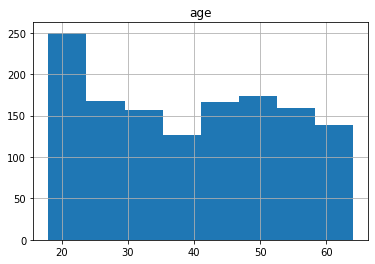

In [ ]:
## Age Distribution
insurance.hist('age', bins = 8)

Around 250 beneficiery are in age group above 18 to 25. As we go further above 25 age, the distribution varies in between 170 people to 130. 

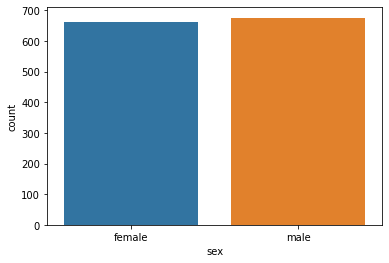

In [ ]:
## Sex Distribution
sns.countplot(x = 'sex', data = insurance)

Almost same male and female beneficieries are there, out of 1330, though count of male beneficieries are somewhat greater in dataset.

In [ ]:
## Region unique
print(insurance['region'].unique())

## Children unique
print(insurance['children'].unique())

['southwest' 'southeast' 'northwest' 'northeast']
[0 1 3 2 5 4]


Four regions from where beneficieries are from are included in these: southwest, southwest, northwest, northeast.

Children count vary between 0 to 5.


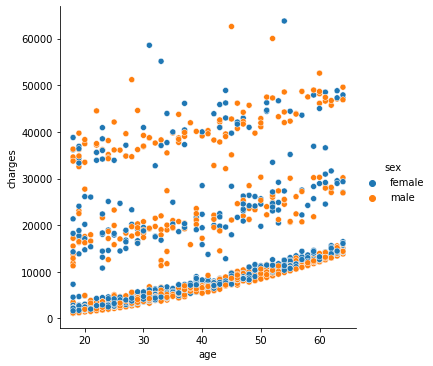

In [ ]:
## Age and Charges relation
sns.relplot(x = 'age', y = 'charges', data = insurance, hue = 'sex')

As the age increases, insurance charges is slightly increses with it. It mainly have 3 groups of distributions, 
(1) between charges 0 - 5000 : Large number of beneficieries
(2) 10000 - 25000 - Medium number
(3) 30000 - 40000 - less number - Also Female beneficiery count is high here.
There are some outliers also, who has charges above 50000.

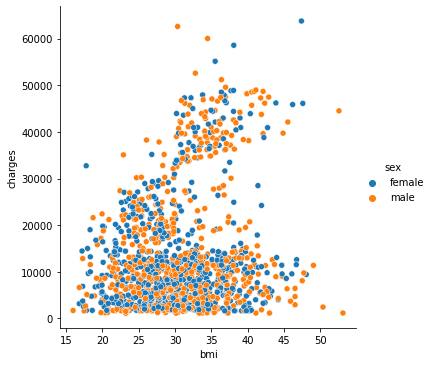

In [ ]:
sns.relplot(x = 'bmi', y = 'charges', data = insurance, hue = 'sex')

For Most of beneficieries, BMI doesnt matter, it has almost same insurance charges  from above 0 to 15000.
But some people do follow pattern here, ie as BMI increases there charges will also increases.
Around some people with 30 - 40 BMI have insurances charges more, ie around 35000 - 50000.

#### Data Preprocessing

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get two datasets different, one with male and other with female beneficiery only.

In [ ]:
fm = pd.get_dummies(insurance['sex'])
fm.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


#### Data labelling

In [ ]:
## changing data type to category
insurance['sex'] = insurance['sex'].astype('category')
insurance['smoker'] = insurance['smoker'].astype('category')
insurance['region'] = insurance['region'].astype('category')
 
## cat.codes - coding the categorical data
insurance['sex'] = insurance['sex'].cat.codes
insurance['smoker'] = insurance['smoker'].cat.codes
insurance['region'] = insurance['region'].cat.codes

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
insurance.to_csv('drive/MyDrive/Datasets/insurance_clean.csv', index= False)

In [ ]:
insurance_male = insurance.drop(['sex'], axis = 1)
insurance_male = pd.concat([ fm['male'],insurance_male], axis = 1)
insurance_male = insurance_male[insurance_male['male'] == 1]
print(insurance_male.shape)
insurance_male.head()

(676, 7)


,male,age,bmi,children,smoker,region,charges
1,1,18,33.770,1,0,2,1725.55230
2,1,28,33.000,3,0,2,4449.46200
3,1,33,22.705,0,0,1,21984.47061
4,1,32,28.880,0,0,1,3866.85520
8,1,37,29.830,2,0,0,6406.41070


In [ ]:
insurance_female = insurance.drop(['sex'], axis = 1)
insurance_female = pd.concat([ fm['female'],insurance_female,], axis = 1)
insurance_female = insurance_female[insurance_female['female'] == 1]
print(insurance_female.shape)
insurance_female.head()

(662, 7)


,female,age,bmi,children,smoker,region,charges
0,1,19,27.90,0,1,3,16884.92400
5,1,31,25.74,0,0,2,3756.62160
6,1,46,33.44,1,0,2,8240.58960
7,1,37,27.74,3,0,1,7281.50560
9,1,60,25.84,0,0,1,28923.13692


These completed the data preparation, cleaning and Exploratory data analysis step for performing further Predictive analysis for medical insurance data.